## Supervised learning, Linear models, and Loss functions

In this project, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set 

We will examine some data representing the miles-per-gallon of 398 cars given other variables describing them:

1. mpg: continuous. The miles-per-gallon of the car.
2. cylinders: multi-valued discrete. Number of cylinders.
3. displacement: continuous. Engine displacement of the car. 
4. horsepower: continuous. Total horsepower of the car.
5. weight: continuous. Weight in lbs.
6. acceleration: continuous. Acceleration 0-60mph in seconds.
9. car name: string (unique for each instance)


## Preliminaries

In [3]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model

%matplotlib inline

In [4]:
# Uncomment if using Google Colab or Kaggle Kernels.
# Imports the data using gdown.
# !gdown https://drive.google.com/uc?id=1PtY3ne37XA8Jk_cAf0Cd7JSRvEU8KDbp


## Part 1: OLS Regression
Investigate the relationship between the cars' weight and their mpg by plotting a scatter plot of the `weight` (x axis) and `mpg` columns (y axis).

In [5]:
# Read the car_data.csv files
df = pd.read_csv('car_data.csv')

# Display the top 5 rows of the dataframe in HTML
display(df.head())

,MPG,cylinders,displacement,horsepower,weight,acceleration,name
0,18.0,8,307.0,130,3504,12.0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,ford torino


Figure 1. Top 5 rows of the car data

In [6]:
# Show the descriptive statistics
df.describe()

,MPG,cylinders,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


Figure 2. Descriptive statistics

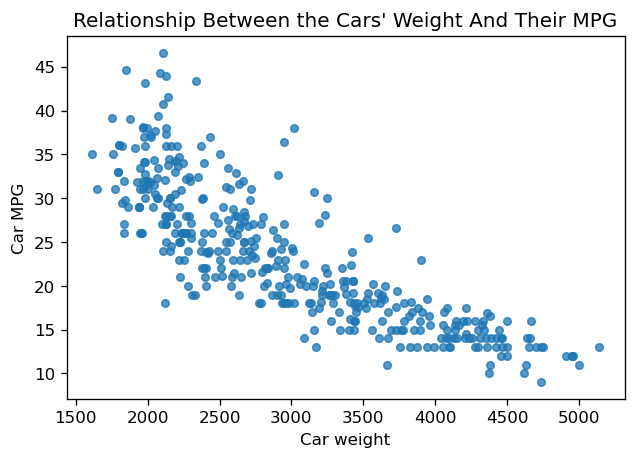

In [7]:
# Plot a scatter plot of the weight (x axis) and mpg columns (y axis)
fig, ax = plt.subplots(dpi = 120)
df.plot.scatter(x = 'weight', y = 'MPG', alpha = 0.75, ax = ax)
plt.title('Relationship Between the Cars\' Weight And Their MPG')
ax.set_xlabel('Car weight')
ax.set_ylabel('Car MPG')
plt.show()

Figure 3. Relationship Between the Cars' Weight And Their MPG

>As weight increases, MPG decreses. Also, it may not be not linear since the data looks quadaric. There is more dispersion at low-weight cars versus high-weight cars.

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector. 

In [8]:
# Function to compute linear model predictions given data and a coefficient vector
# b: 1d-array of coefficients
# X: design matrix as a 2d-array
def linearModelPredict(b, X):
    # Get Model prediction
    # Numpy does matrix multiplication in a few ways
    # The dot or @ operator are most common
    # b should always have the same dimensionality as X has columns
    predY = X @ b
    
    # Return Model prediction
    return predY

In [9]:
# Set X and b for testing
X = np.array([[1,0], [1,-1], [1,2]])
b = np.array([0.1, 0.3])

# Print the answer
answer = linearModelPredict(b, X)
print("Predicted y: ", answer)

Predicted y:  [ 0.1 -0.2  0.7]


In [10]:
# Note that b can either be a 2d array or a 1d array and the multiplication will still work
# This requires you to be cognizant about shapes and keep track of the dimension
# Here are some examples

# b is a 2d array
print('Using a 2d array...')
X = np.eye(2)
b = 2 * np.ones(2).reshape(-1,1)

print("X looks like:\n", X)
print("b looks like:\n", b)

# Note, the result of this multiplication is a 2d array
print("X@b is \n ", linearModelPredict(b,X))


# b is a 1d array
print('\n\nUsing a 1d array...')
X = np.eye(2)
b = 2 * np.ones(2)

print("X looks like:\n", X)
print("b looks like:\n", b)

# Note, the result of this multiplication is a 1d array
print("X@b is \n ", linearModelPredict(b,X))

Using a 2d array...
X looks like:
 [[1. 0.]
 [0. 1.]]
b looks like:
 [[2.]
 [2.]]
X@b is 
  [[2.]
 [2.]]


Using a 1d array...
X looks like:
 [[1. 0.]
 [0. 1.]]
b looks like:
 [2. 2.]
X@b is 
  [2. 2.]


Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss. 

In [11]:
# Function to compute and return the loss function for an OLS model parameterized by beta
# as well as the gradient of the loss
# b: 1d-array of coefficients for the linear model
# X: 2d-array of the design matrix
# y: 1d-array of observed outcomes
def linearModelLossRSS(b, X, y):
    # Get Model prediction
    predY = linearModelPredict(b, X)
    
    # Get the vector of residuals
    res = y - predY
    
    # Get the residuals sums of squares
    rss = sum(res**2)
    
    # Get the gradient
    gradient = -2 * (X.T @ res)
    
    # Return rss and gradient
    return (rss, gradient)

In [12]:
# Test the function
# Set X, b, y
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

# Print the answers
rss, gradient = linearModelLossRSS(b, X, y)
print("The loss function for an OLS model parameterized by beta is", rss, 
      "and the gradient of the loss is", gradient)

The loss function for an OLS model parameterized by beta is 2.06 and the gradient of the loss is [-3.6 -4. ]


The gradient is negative for both parameters. Therefore, both need to be increased to minimize the cost.

You've implemented a loss function. It is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.

In [13]:
# Function to fit a linear model
# X: 2d-array of design matrix
# y: 1d-array of outcomes
# lossfcn: a function which returns as a tuple the value of the loss as well as the gradient of the loss
def linearModelFit(X, y, lossfcn):
    # Set starting values
    # Get the number of columns for X
    rownum, colnum = X.shape
    bstart = np.zeros((colnum, 1)) 
    
    # Call the optimization function
    RESULT = so.minimize(lossfcn, bstart, args=(X,y), jac=True, options={'disp': True})
    
    # Get estimated betas
    est_betas = RESULT.x

    # Calculate TSS
    TSS = sum((y - np.mean(y)) ** 2)
    
    # Get RSS
    RSS, deriv = linearModelLossRSS(est_betas, X, y)
    
    # Compute goodness of fit
    R2 = 1 - (RSS/TSS)
    
    return est_betas, R2

In [14]:
# Set X, y for testing
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2])

# Print answers
beta, R2 = linearModelFit(X,y,linearModelLossRSS)
print("Estimated betas:", beta)
print("R2:", R2)

Optimization terminated successfully.
         Current function value: 0.560000
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6
Estimated betas: [0.6 0.6]
R2: 0.75


Now, use the above functions to fit your model to the car data. Use the MPG as the target (y) variable and the weight as the independent (x).

Optimization terminated successfully.
         Current function value: 7321.233706
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
R2:  0.6926304331206254


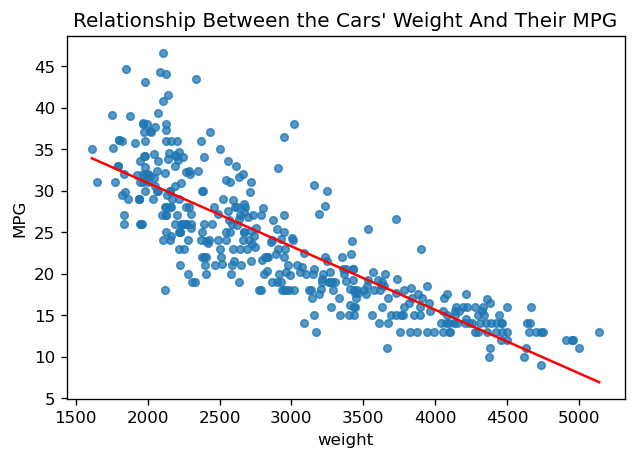

In [15]:
# Create arrays for y and X
y = np.array(df.MPG)
weight = np.array(df.weight)
N = weight.size
X = np.c_[np.ones(N), weight]

# Get batas and R2 using MPG and weight
betas, R2 = linearModelFit(X, y, linearModelLossRSS)

# Create a new data
x_grid = np.linspace(weight.min(), weight.max(), 100)

# Make a design matrix
Xn = np.c_[np.ones(x_grid.size), x_grid]

# Compute predictions with the new data and estimated coefficients
yn = linearModelPredict(betas, Xn)

# Make a plot
fig, ax = plt.subplots(dpi = 120)
plt.title('Relationship Between the Cars\' Weight And Their MPG')
df.plot.scatter(x = 'weight', y = 'MPG', alpha = 0.75, ax = ax)
ax.plot(x_grid, yn, color = 'red')

print("R2: ", R2)

Figure 4. Red line is a line for the predicted values

## Part 2: LAD Regression
In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.

In [24]:
# Function for computing the least absolute deviation loss function for a linear model parameterized by beta
# as well as the gradient of the loss
# b: 1d-array of coefficients for the linear model
# X: 2d-array of the design matrix
# y: 1d-array of observed outcomes
def linearModelLossLAD(b,X,y):
    # Same concept as before, different loss
    predY = linearModelPredict(b,X)
    res = y - predY
    sres = np.sign(res)
    loss = sum(abs(res))
    
    # Note the gradients are computed using the sign of the residuals
    grad = -(np.dot(sres, X))

    return (loss, grad)

In [25]:
# Set X, y, b for testing
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

# print the loss and gradient
lad, grad =linearModelLossLAD(b,X,y)

print("LAD is", lad)
print("gradient:\n", grad)

LAD is 2.0
gradient:
 [-1. -1.]


Use the above functions to fit your LAD model. 

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.

         Current function value: 1273.149717
         Iterations: 7
         Function evaluations: 60
         Gradient evaluations: 55


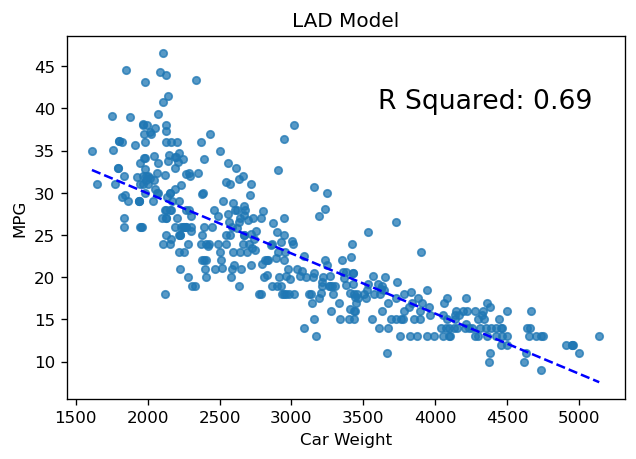

In [28]:
# Create arrays for y and x
y = np.array(df.MPG)
weight = np.array(df.weight)
N = weight.size 
X = np.c_[np.ones(N), weight]

# Get batas and R2 using MPG and weight
betas, R2 = linearModelFit(X, y, linearModelLossLAD)

# Create a new data
x_grid = np.linspace(weight.min(), weight.max(), 100)

# Make a design matrix
Xn = np.c_[np.ones(x_grid.size), x_grid]

# Get prediction
yp = linearModelPredict(betas, Xn)

# Make a plot
fig, ax = plt.subplots(dpi = 120)
plt.title('Relationship Between the Cars\' Weight And Their MPG')
df.plot.scatter(x = 'weight', y = 'MPG', alpha = 0.75, ax = ax)
ax.set_xlabel('Car Weight')
ax.set_ylabel('MPG')
ax.plot(x_grid, yp, color = 'blue', linestyle = '--')
ax.annotate('R Squared: {R2}'.format(R2=R2.round(2)), 
            xy=(0.75, 0.8), 
            xycoords='axes fraction',
            ha='center',
            fontsize = 16)

ax.set_title('LAD Model')

# Display the image
plt.show()

Figure 5. Blue line is the fitted line.

**(Note: L1 = LAD, L2 = OLS)**

>The LAD fit does not give as much weight to the outliers as the OLS fit. The $R^2$ value is identical, however. One would normally expect OLS to be slightly higher than LAD due to the optimization function being optimized. Because OLS is minimizing the RSS, it may have the highest R2 value possible for that class of models.

Now we will use all data for the fit. Fit an OLS model to the car data (excluding the name) with the `linear_model` module from the `sklearn` package by using the [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class.

In [31]:
from sklearn.linear_model import LinearRegression

# Create an array for y and X
y = np.array(df.MPG)

# Drop name and MPG datas
newdf = df.drop(columns=['name', 'MPG'])

# Get the number of rows
N = newdf.shape[0]

# Converts dataframe to numpy array
newarr = newdf.to_numpy()

# Create X array 
X = np.c_[np.ones(N), newarr]

# Fit an OLS model to the car data 
reg = LinearRegression().fit(X, y)

# Print r2
print("R2 from sklearn: ", reg.score(X, y).round(2))

# OR
# Here, I am showing my models a dataframe.
y = df.MPG.values
X = df.iloc[:, 1:6]
ols_fit = linear_model.LinearRegression().fit(X, y)

# Print r2
print('OLS rsquared: ', ols_fit.score(X,y).round(2))

# Get the residuals from the fit
y_predicted = ols_fit.predict(X)
res = y - y_predicted

tss = sum((y-y.mean())**2)

rss = sum(res**2)

r2 = 1 - rss/tss

print('R-squared: ', r2)

R2 from sklearn:  0.71
OLS rsquared:  0.71
R-squared:  0.7076926326770516


The $R^2$ now is 0.71, which is very close to the 0.69 we have gotten using only weight. We can identify then that weight is the most important factor of the ones given here for the purposes of identifying MPG consumption.